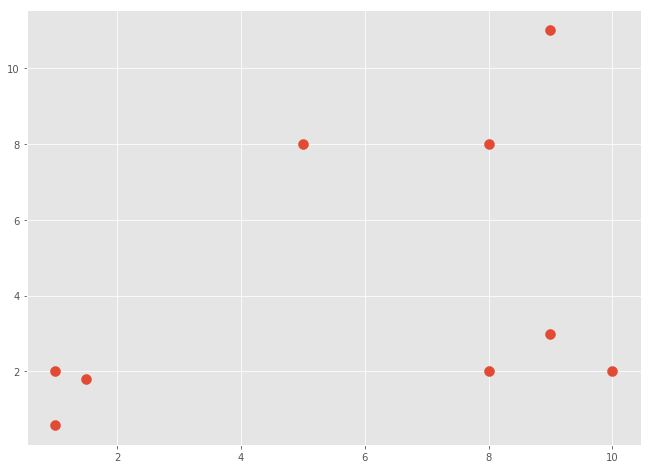

In [3]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = "11,8"
from matplotlib import style
style.use('ggplot')
import numpy as np

X = np.array ([[1,2],
              [1.5,1.8],
              [5,8],
              [8,8],
              [1,0.6],
              [9,11],
              [8,2],
              [10,2],
              [9,3]])

plt.scatter(X[:,0] , X[:,1], s=100)
plt.show()
colors = 10*["g","r","c","b","k"]

In [11]:
class Mean_Shift:
    def __init__(self, radius=2):
        self.radius = radius
    
    
    def fit(self, data):
        centroids = {}
        
        for i in range(len(data)):                  #giving the centroids their key and each data is a centroid at first
            centroids[i] = data[i]
        
        while True:
            new_centroids = []
            for i in centroids:
                in_bandwidth = []                   #containing al feature-sets inside our curernt bandwidth
                centroid = centroids[i]             #just taking the current centroid's value
                for featureset in data:             #for finding which points are inside this radius/bandwidth
                    if np.linalg.norm(featureset - centroid) < self.radius:
                        in_bandwidth.append(featureset)
                                                    #now found the mean of those centroids inside this bandwidth
                new_centroid = np.average(in_bandwidth, axis=0) 
                                                    #converting the array version into a tuple version.
                new_centroids.append(tuple(new_centroid))
                
                                                    #getting a sorted list of the set version of unique tuples
            uniques = sorted(list(set(new_centroids)))
            
            prev_centroids = dict(centroids)        #saving the previous values of all the centroids
            
            centroids = {}                          #we populated it b4 entering here, so declared again newly
            for i in range(len(uniques)):           #storing the array version of each uniques tuple-set in the dict
                centroids[i] = np.array(uniques[i])
                
                                                    #we stored new controids, then found uniqu ones from them
                                                    #now will check if equal with previous version...if equal then optimized
                                                    #then we stop iterating the whole system anymore
            optimized = True
            for i in centroids:
                if not np.array_equal(centroids[i], prev_centroids[i]): optimized = False
                if not optimized: break
            if optimized: break
        
        self.centroids = centroids
        
        
    def predict(self, data):
        return

In [12]:
clf = Mean_Shift()
clf.fit(X)

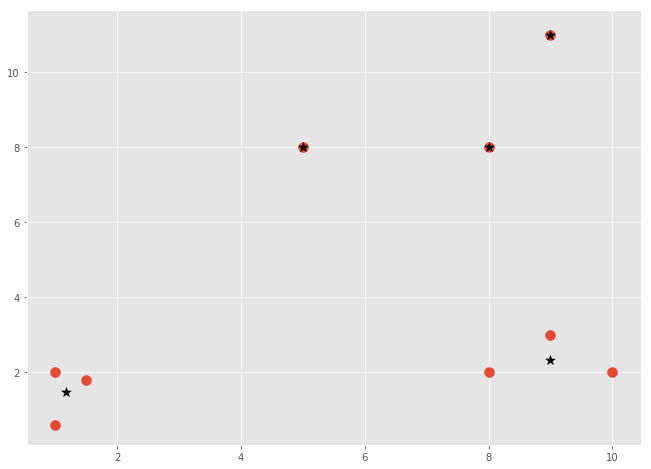

In [13]:
#we recording the centroids of the obj to plot them
centroids = clf.centroids                          

plt.scatter(X[:,0] , X[:,1], s=100)                #this scatters/plots the data
for c in centroids:                                #this scatters/plots the final centroids
    plt.scatter(centroids[c][0], centroids[c][1], color='k', marker='*', s=100)
plt.show()

### radius boro choto kore kore change korle, cluster centroids'o change hobe, which in turn will change the entire clusters
    so amra jnina j kon radius will b best for the dataset
    ei jnno we need to use dynamic bandwidths....where machine weight die die bujhe nibe kon radius will be the BEST

In [ ]:
class Mean_Shift_dynamicRadius:
    def __init__(self, radius=None, radius_norm_step=100):
        self.radius = radius
        self.radius_norm_step = radius_norm_step
    
    
    def fit(self, data):
        if self.radius == None:                         
            all_data_centroid = np.average(data, axis=0)        #just the first case to find centroid of entire data
            all_data_norm = np.linalg.norm(all_data_centroid)   
            self.radius = all_data_norm / self.radius_norm_step #defining the radius 
            
        
        centroids = {}
        
        for i in range(len(data)):                  
            centroids[i] = data[i]
        
        while True:
            new_centroids = []
            for i in centroids:
                in_bandwidth = []                   
                centroid = centroids[i]       
                
                weights = [i for i in range(self.radius_norm_step)][::-1]  #weights are given for each radius, 
                                                                           #and sorted decreasingly: 99,98,...,1,0
                
                for featureset in data:             
                    distance = np.linalg.norm(featureset-centroid)
                    if distance == 0: distance = 0.000000001
                    weight_index = int(distance/self.radius)               #each featureset's weight for that radius(see cpy)
                    
                                                    
                new_centroid = np.average(in_bandwidth, axis=0) 
                                                    
                new_centroids.append(tuple(new_centroid))
                                                 
            uniques = sorted(list(set(new_centroids)))
            
            prev_centroids = dict(centroids)        
            
            centroids = {}                          
            for i in range(len(uniques)):           
                centroids[i] = np.array(uniques[i])
                
                                                    
            optimized = True
            for i in centroids:
                if not np.array_equal(centroids[i], prev_centroids[i]): optimized = False
                if not optimized: break
            if optimized: break
        
        self.centroids = centroids
        
        
    def predict(self, data):
        return